**IMDB PROJECT**

In [1]:
# import dependencies required for the project
import requests                    # Used to send HTTP requests to the website
from bs4 import BeautifulSoup      # Used to parse and navigate through HTML content
import pandas as pd                # Used to create a DataFrame and handle data manipulation
import json                        # Used to work with JSON data
 
import matplotlib.pyplot as plt   # Used to plot charts

Matplotlib is building the font cache; this may take a moment.


**STEP 1: FETCHING MOVIES FROM URL**

In [2]:
# Define URL of the IMDb chart for top rated movies
url = "https://www.imdb.com/chart/top/"
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

In [3]:
# Send a GET request to fetch the webpage content
response = requests.get(url, headers=headers)

In [4]:
response


<Response [200]>

**STEP 2: PARSE THE HTML CONTENT USING BEAUTIFULSOUP**

In [5]:
soup = BeautifulSoup(response.text, 'html.parser')

**STEP 3: EXTRACT JSON STRUCTURED DATA CONTAINING MOVIE TITLES**

In [6]:
script_tag = soup.find('script', type='application/ld+json')
if script_tag:
    # Convert the JSON data (string) into a Python dictionary
    data = json.loads(script_tag.string)

**STEP 4: EXTRACT MOVIE DETAILS**

In [7]:
# Initialize the lists to hold relevant details
titles = []
durations = []
urls = []
descriptions = []
rating_values = []

In [8]:
if 'itemListElement' in data:

    # Loop through each movie in the 'itemListElement'

    for item in data['itemListElement']:

        # Access the individual movie data inside 'item'

        movie = item['item']

        # Extract movie details and append them to the corresponding lists

        # If a specific field is missing, we use 'N/A' as a fallback

        titles.append(movie.get('name', 'N/A'))  # Movie title

        durations.append(movie.get('duration', 'N/A'))  # Movie duration

        urls.append(movie.get('url', 'N/A'))     # IMDb page URL

        descriptions.append(movie.get('description', 'N/A'))  # Movie description                

        rating_values.append(movie.get('aggregateRating', {}).get('ratingValue', 'N/A'))  # Current movie rating

# Creating pandas dataframe to store the extracted data

df = pd.DataFrame({

    'Title': titles,              # Column for movie titles

    'Duration': durations,         # Column for the movie's duration 

    'URL': urls,                  # Column for IMDb URLs

    'Description': descriptions,  # Column for movie descriptions 

    'Rating Value': rating_values # Column for the actual user rating   

})

 

In [9]:
# Save the DataFrame to a CSV file
df.to_csv('scrapped_IMDBmovies.csv', index=False)  # index=False means we do not save the index column
print("Data saved as 'scrapped_IMDBmovies.csv'")

Data saved as 'scrapped_IMDBmovies.csv'


In [10]:
df.head()

,Title,Duration,URL,Description,Rating Value
0,The Shawshank Redemption,PT2H22M,https://www.imdb.com/title/tt0111161/,A banker convicted of uxoricide forms a friend...,9.3
1,The Godfather,PT2H55M,https://www.imdb.com/title/tt0068646/,The aging patriarch of an organized crime dyna...,9.2
2,The Dark Knight,PT2H32M,https://www.imdb.com/title/tt0468569/,When a menace known as the Joker wreaks havoc ...,9.0
3,The Godfather Part II,PT3H22M,https://www.imdb.com/title/tt0071562/,The early life and career of Vito Corleone in ...,9.0
4,12 Angry Men,PT1H36M,https://www.imdb.com/title/tt0050083/,The jury in a New York City murder trial is fr...,9.0


**STEP 4: Data Cleaning and Transformation**

In [11]:
# Count None values per row
nan_counts = df.isna().sum(axis=1)
print(f"Total number of NaN values:\n {df.isna().sum()}")

Total number of NaN values:
 Title           0
Duration        0
URL             0
Description     0
Rating Value    0
dtype: int64


In [12]:
# Count Null values per row
nan_counts = df.isnull().sum(axis=1)
print(f"Total number of null values:\n {df.isnull().sum()}")

Total number of null values:
 Title           0
Duration        0
URL             0
Description     0
Rating Value    0
dtype: int64


In [13]:
# Check for duplicate values
duplicates = df.duplicated(keep=False)
df.duplicated().sum()
print(f"There are {df.duplicated().sum()} duplicate entries.")

There are 0 duplicate entries.


In [14]:
# Data Transformation
# Convert ISO time format into minutes only
def convert_iso_to_minutes(iso_duration):
    # Remove the "PT" prefix
    iso_duration = iso_duration.replace("PT", "")
 
    # Initialize hours and minutes
    hours = 0
    minutes = 0
 
    # Find the "H" and "M" components
    if "H" in iso_duration:
        hours = int(iso_duration.split("H")[0])
        iso_duration = iso_duration.split("H")[1]
    if "M" in iso_duration:
        minutes = int(iso_duration.split("M")[0])
 
    # Convert hours to minutes and sum up
    total_minutes = (hours * 60) + minutes
    return total_minutes

In [15]:
df['Duration'] = df['Duration'].apply(convert_iso_to_minutes)
df.head()

,Title,Duration,URL,Description,Rating Value
0,The Shawshank Redemption,142,https://www.imdb.com/title/tt0111161/,A banker convicted of uxoricide forms a friend...,9.3
1,The Godfather,175,https://www.imdb.com/title/tt0068646/,The aging patriarch of an organized crime dyna...,9.2
2,The Dark Knight,152,https://www.imdb.com/title/tt0468569/,When a menace known as the Joker wreaks havoc ...,9.0
3,The Godfather Part II,202,https://www.imdb.com/title/tt0071562/,The early life and career of Vito Corleone in ...,9.0
4,12 Angry Men,96,https://www.imdb.com/title/tt0050083/,The jury in a New York City murder trial is fr...,9.0


**STEP 5: DATA VISUALIZATION**

In [23]:
#Box plot
plt.figure(figsize = (25,10))

<Figure size 2500x1000 with 0 Axes>

<Figure size 2500x1000 with 0 Axes>

Text(0.5, 0, 'Rating')

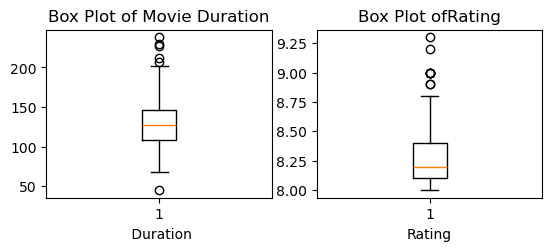

In [25]:
# Box plot for  Duration 
plt.subplot(2,2,1)
plt.boxplot(df['Duration'])
plt.title('Box Plot of Movie Duration')
plt.xlabel(' Duration')
 
# Box plot for  Rating
plt.subplot(2,2,2)
plt.boxplot(df['Rating Value'])
plt.title('Box Plot ofRating')
plt.xlabel('Rating')

Text(0, 0.5, 'Movie Duration')

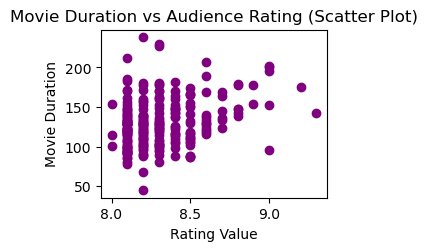

In [26]:
# Scatter plot for Rating Value and Movie Duration
plt.subplot(2, 2, 3)  
plt.scatter(x=df['Rating Value'], y=df['Duration'], color='purple')
plt.title('Movie Duration vs Audience Rating (Scatter Plot)')
plt.xlabel('Rating Value')
plt.ylabel('Movie Duration')

In [27]:
df.to_csv('final_IMDBmovies.csv', index=False)  
print("Final data saved as 'final_IMDBmovies.csv'")     

Final data saved as 'final_IMDBmovies.csv'
